In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



## Dataset sample
customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15634602,619,France,Female,42,2,0,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15592531,822,France,Male,50,7,0,2,1,1,10062.8,0
15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15792365,501,France,Male,44,4,142051.07,2,0,1,74940.5,0
15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
15767821,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
15737173,497,Spain,Male,24,3,0,2,1,0,76390.01,0
15632264,476,France,Female,34,10,0,2,1,0,26260.98,0
15691483,549,France,Female,25,5,0,2,0,0,190857.79,0
15600882,635,Spain,Female,35,7,0,2,1,1,65951.65,0
15643966,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
15788218,549,Spain,Female,24,9,0,2,1,1,14406.41,0
15661507,587,Spain,Male,45,6,0,1,0,0,158684.81,0
15568982,726,France,Female,24,6,0,2,1,1,54724.03,0
15577657,732,France,Male,41,8,0,2,1,1,170886.17,0
15597945,636,Spain,Female,32,8,0,2,1,0,138555.46,0
15699309,510,Spain,Female,38,4,0,1,1,0,118913.53,1
15725737,669,France,Male,46,3,0,2,0,1,8487.75,0
15625047,846,France,Female,38,5,0,1,1,1,187616.16,0
15738191,577,France,Male,25,3,0,2,0,1,124508.29,0
15736816,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
15700772,571,France,Male,44,9,0,2,0,0,38433.35,0
15728693,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0
15656300,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
15589475,591,Spain,Female,39,3,0,3,1,0,140469.38,1
15706552,533,France,Male,36,7,85311.7,1,0,1,156731.91,0
15750181,553,Germany,Male,41,9,110112.54,2,0,0,81898.81,0
15659428,520,Spain,Female,42,6,0,2,1,1,34410.55,0
15732963,722,Spain,Female,29,9,0,2,1,1,142033.07,0
15794171,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
15788448,490,Spain,Male,31,3,145260.23,1,0,1,114066.77,0
15729599,804,Spain,Male,33,7,76548.6,1,0,1,98453.45,0
15717426,850,France,Male,36,7,0,1,1,1,40812.9,0



In [2]:
# import the dataset
dataset = pd.read_csv('Bank_Customer_Churn_Prediction.csv')
# X = dataset.iloc[:, 3:13].values
# y = dataset.iloc[:, 13].values

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values




In [3]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df = dataset.copy()

df.drop(['customer_id'],axis=1,inplace=True)


<AxesSubplot:>

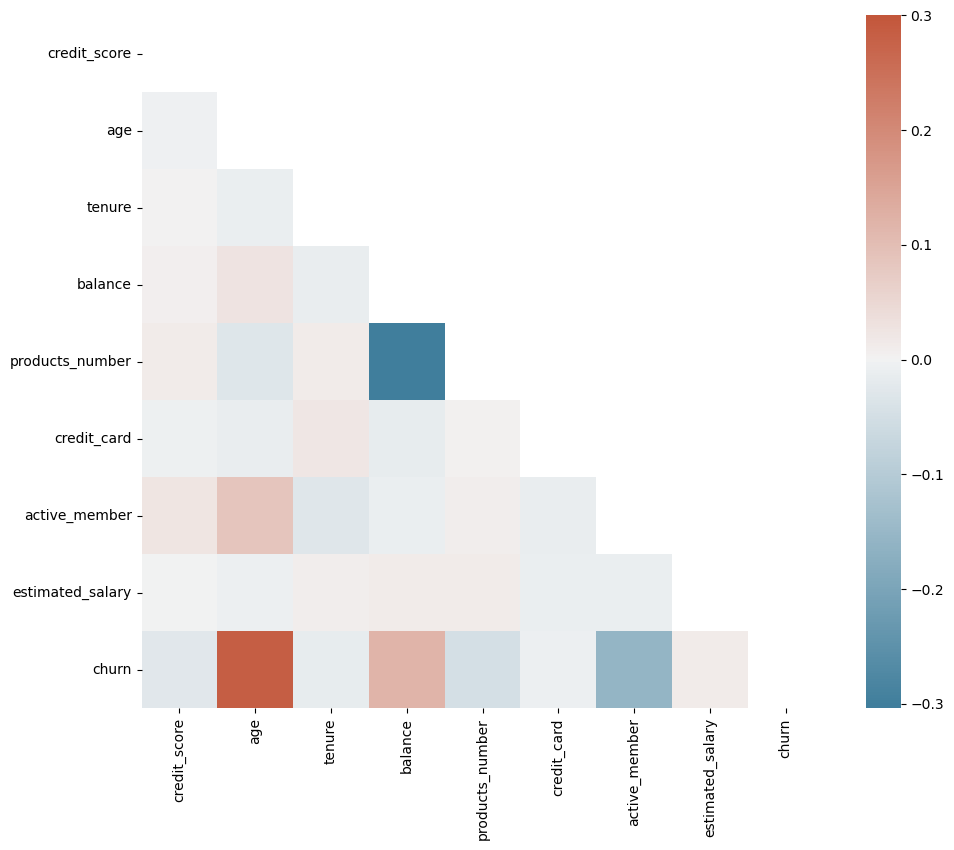

In [6]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0)


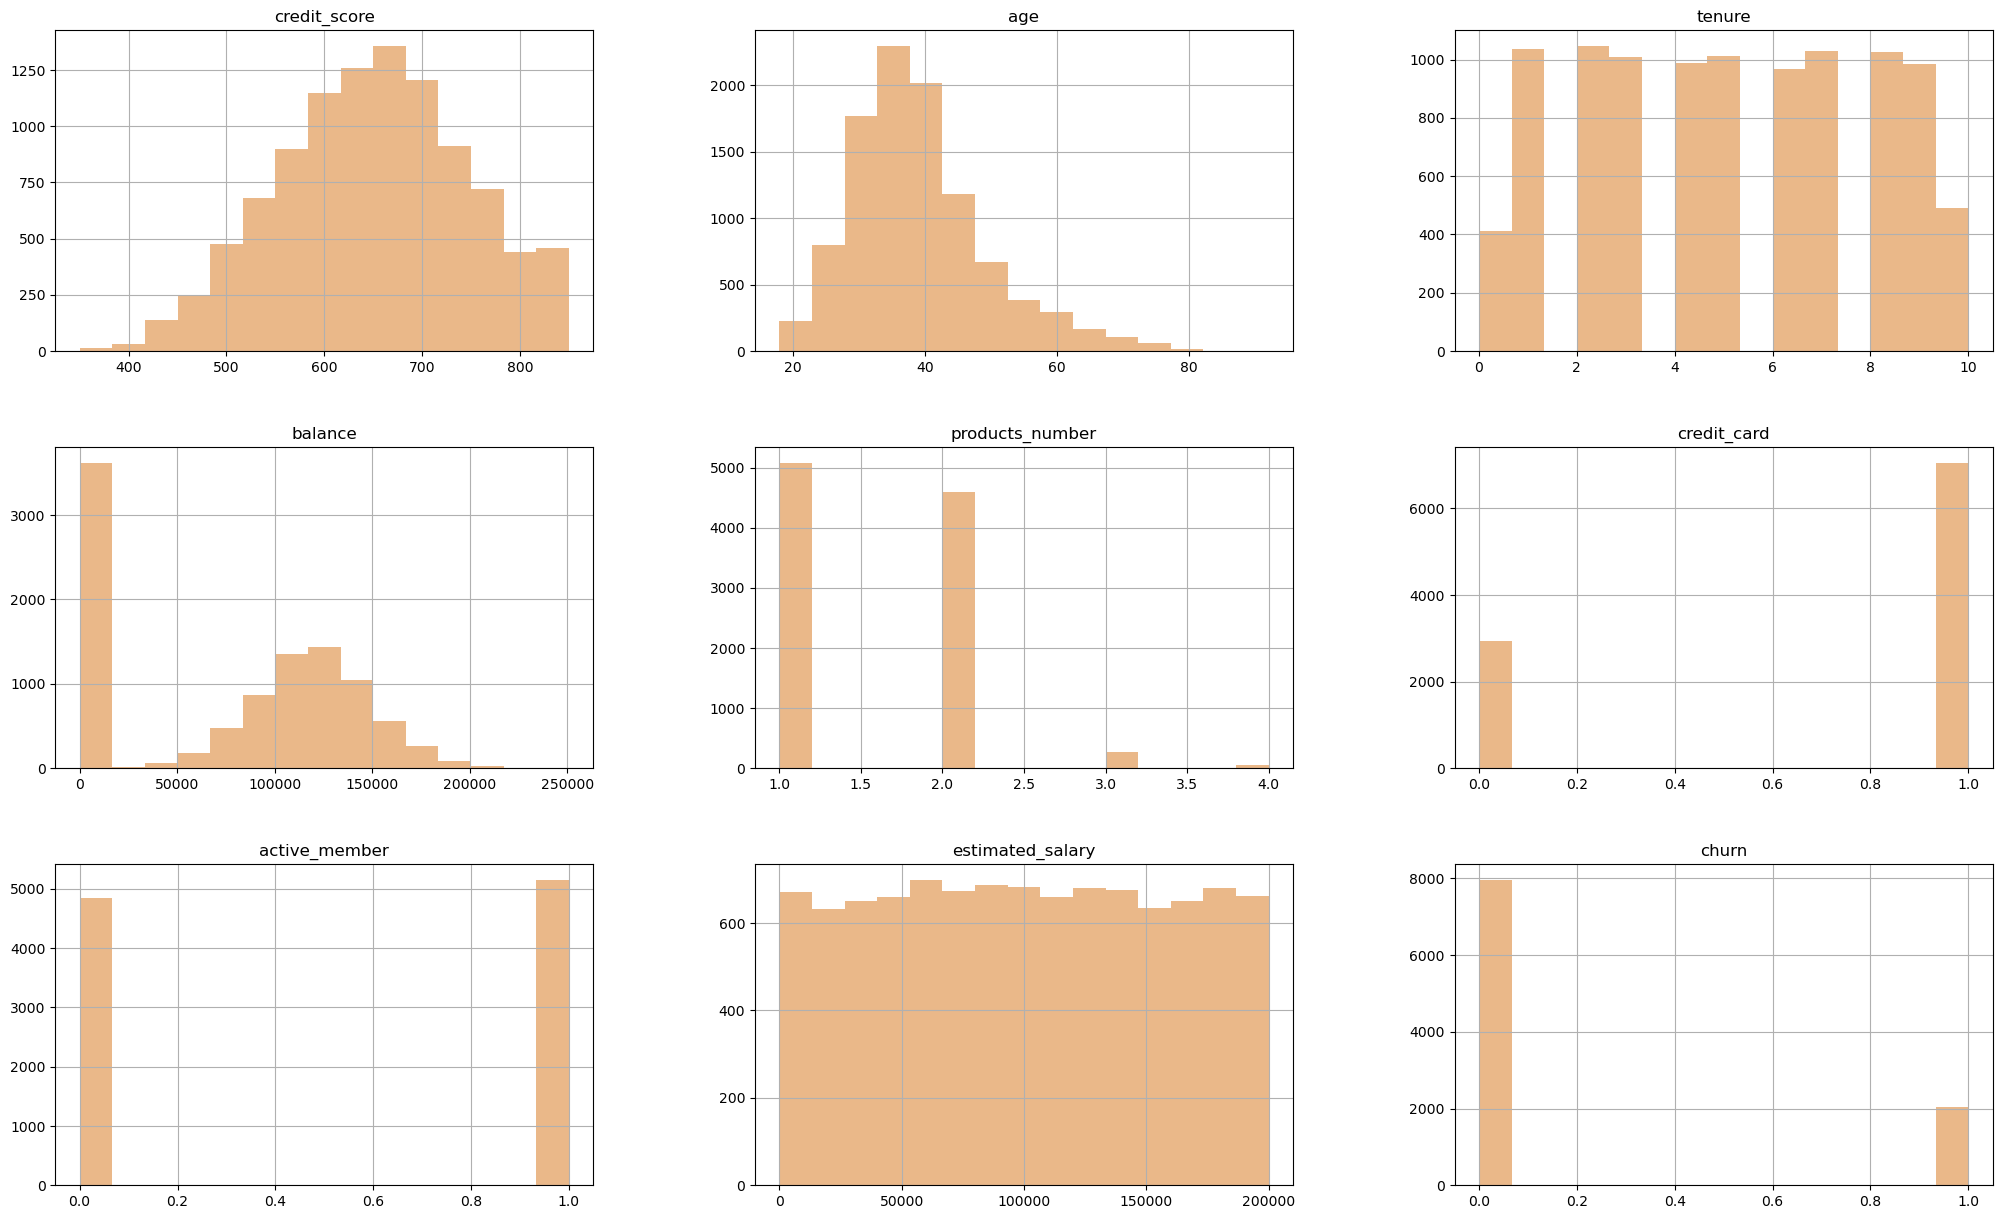

In [7]:


color = '#eab889'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()



In [8]:
# determine the percentage of customers who have a non-zero balance, who have a credit card, and who are active members
print('Percentage of customers who have a non-zero balance: {:.2f}%'.format(df[df['balance'] > 0].shape[0] / df.shape[0] * 100))
print('Percentage of customers who have a credit card: {:.2f}%'.format(df[df['credit_score'] > 0].shape[0] / df.shape[0] * 100))
print('Percentage of customers who are active members: {:.2f}%'.format(df[df['estimated_salary'] > 0].shape[0] / df.shape[0] * 100))


Percentage of customers who have a non-zero balance: 63.83%
Percentage of customers who have a credit card: 100.00%
Percentage of customers who are active members: 100.00%


In [9]:


import plotly.graph_objects as go
colors = ['mediumturquoise', 'green', 'lightgreen']
df1=df['country'].value_counts()
fig = go.Figure(data=[go.Pie(labels=df1.index,values=df1.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                    marker=dict(colors=colors, line=dict(color='#000000', width=5)))
fig.update_layout(autosize=False,
    width=900,
    height=500,font=dict(
        family="Courier New, monospace",
        size=20,
        color="#0c0b0c"),

    title_text='Global Client Distribution'
fig.show()



In [11]:
# credit score distribution graph

fig = px.box(df, y="credit_score")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=50,
        pad=1
    ),
    paper_bgcolor="LightBlue",
)
fig.update_traces(jitter=0,    name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of credit score')
fig.show()



In [12]:
# age distribution graph

fig = px.box(df, y="age")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightBlue",
)
fig.update_traces(jitter=0,name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of age')
fig.show()

In [14]:
# balance distribution graph

fig = px.box(df, y="balance")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightBlue",
)
fig.update_traces(jitter=0,name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of balance')
fig.show()


fig.show()



In [15]:
# pd.get_dummies() is a function that turns categorical variables into dummy/indicator variables.
df = pd.get_dummies(df, columns = ['gender','country'])
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [17]:
# StratifiedShuffleSplit:  This is a class that implements a variation of 
#    stratified sampling to produce train/test indices to split data in train/test sets.
# 2. n_splits: This parameter is the number of re-shuffling & splitting iterations.
# 3. test_size: This parameter is the proportion of the dataset to include in the test split.
# 4. random_state: This parameter is the seed used by the random number generator.
# 5. for train_index, test_index in split.split(df, df['churn']): This is a for loop that 
#    iterates through the split object and splits the dataset based on the indices of the 
#    train and test sets.
# 6. strat_train_set=df.loc[train_index]: This is a pandas dataframe that contains the 
#    training set.
# 7. strat_test_set=df.loc[test_index]: This is a pandas dataframe that contains the test 
#    set. """

from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42)

for train_index, test_index in split.split(df, df['churn']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]



In [18]:
# 1. The function takes a pandas dataframe as input. 
# 2. It checks if the input dataframe has the labels column. If it does, it stores the labels in a variable and drops the column from the input dataframe. If it doesn't, it just sets the labels variable to None.
# 3. It then uses the StandardScaler from sklearn to scale the numerical columns of the input dataframe. It then stores the result in a variable called data_scaled.
# 4. It then concatenates the scaled numerical data with the categorical data. It does this by using np.hstack to stack the scaled numerical data on top of the categorical data. 
# 5. It then returns the output and the labels.
def data_transformations(data):
        if 'churn' in data.columns:
            labels=data['churn']
            data=data.drop('churn', axis=1)
        else:
            labels=None
    
        
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        data_scaled=scaler.fit_transform(data.select_dtypes(include=[np.number]))
        
        #output=np.hstack([data_scaled,data_cat_1hot])
        output=np.hstack([data_scaled,data.select_dtypes(exclude=[np.number])])
        
        return output, labels

In [19]:
train_data, test_labels = data_transformations(strat_train_set)

In [20]:
test_data, test_labels = data_transformations(strat_test_set)

In [21]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
LR = LogisticRegression(C=0.01, solver='liblinear').fit(train_data,test_labels)
LR

ValueError: Found input variables with inconsistent numbers of samples: [6700, 3300]